# Introdução ao Pandas DataFrame

O **DataFrame** é considerado por muitos como o principal objeto do módulo Pandas. Ele pode ser visto como uma matriz com linhas e colunas rotuladas ou simplesmente como um conjunto de Series. Cada coluna de um DataFrame pode ser retornado como uma Series.

Para mais informações sobre o objeto **DataFrame** do Pandas clique [aqui](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html).

O código fonte do objeto DataFrame está disponível no Github. Quem tiver curiosidade pode visualizar clicando [aqui](https://github.com/pandas-dev/pandas/blob/v0.24.2/pandas/core/frame.py).

In [3]:
# Importando os módulos
import numpy as np
import pandas as pd

/home/betania/.pyenv/versions/3.7.8/envs/puc/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
linhas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
colunas = ["A", "B", "C", "D", "E"]
np.random.seed(1)
dados = np.random.randint(0,100,(10,5))
df = pd.DataFrame(dados, linhas, colunas)
df

,A,B,C,D,E
1,37,12,72,9,75
2,5,79,64,16,1
3,76,71,6,25,50
4,20,18,84,11,28
5,29,14,50,68,87
6,87,94,96,86,13
7,9,7,63,61,22
8,57,1,0,60,81
9,8,88,13,47,72
10,30,71,3,70,21


In [5]:
type(df)

pandas.core.frame.DataFrame

In [7]:
# Informações sobre o DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       10 non-null     int64
 1   B       10 non-null     int64
 2   C       10 non-null     int64
 3   D       10 non-null     int64
 4   E       10 non-null     int64
dtypes: int64(5)
memory usage: 480.0 bytes


In [8]:
# Medidas estatísticas do DataFrame
df.describe()

,A,B,C,D,E
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,35.800000,45.500000,45.100000,45.300000,45.000000
std,28.785799,37.880661,36.354581,27.912761,31.742016
min,5.000000,1.000000,0.000000,9.000000,1.000000
25%,11.750000,12.500000,7.750000,18.250000,21.250000
50%,29.500000,44.500000,56.500000,53.500000,39.000000
75%,52.000000,77.000000,70.000000,66.250000,74.250000
max,87.000000,94.000000,96.000000,86.000000,87.000000


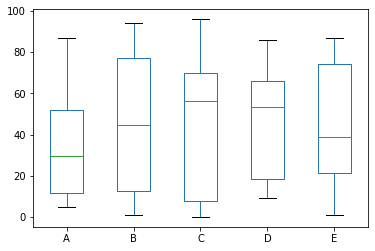

In [13]:
# Plotagem de gráficos
%matplotlib inline
df.plot.box();

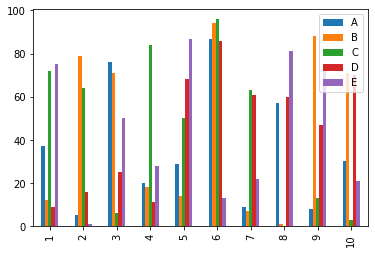

In [12]:
df.plot.bar();

In [14]:
# Selecionar uma coluna
df["A"]

1     37
2      5
3     76
4     20
5     29
6     87
7      9
8     57
9      8
10    30
Name: A, dtype: int64

In [15]:
df["B"]

1     12
2     79
3     71
4     18
5     14
6     94
7      7
8      1
9     88
10    71
Name: B, dtype: int64

In [16]:
type(df["B"])

pandas.core.series.Series

In [17]:
# Selecionando múltiplas colunas
df[["C", "D", "E"]]

,C,D,E
1,72,9,75
2,64,16,1
3,6,25,50
4,84,11,28
5,50,68,87
6,96,86,13
7,63,61,22
8,0,60,81
9,13,47,72
10,3,70,21


In [18]:
# Notação alternativa para seleção de colunas através do ponto (.)
df.B

1     12
2     79
3     71
4     18
5     14
6     94
7      7
8      1
9     88
10    71
Name: B, dtype: int64

In [19]:
# Inclusão de colunas
df["Total"] = df.A + df.B + df.C + df.D + df.E
df

,A,B,C,D,E,Total
1,37,12,72,9,75,205
2,5,79,64,16,1,165
3,76,71,6,25,50,228
4,20,18,84,11,28,161
5,29,14,50,68,87,248
6,87,94,96,86,13,376
7,9,7,63,61,22,162
8,57,1,0,60,81,199
9,8,88,13,47,72,228
10,30,71,3,70,21,195


In [20]:
# Somatório de cada coluna
df.sum()
type(df.sum())

pandas.core.series.Series

In [21]:
# Média aritmética de cada coluna
df.mean()

A         35.8
B         45.5
C         45.1
D         45.3
E         45.0
Total    216.7
dtype: float64

In [22]:
# Adicionando um nova linha com o somatório
tot_coluna = pd.DataFrame(np.array(df.sum()).reshape(1,6), index=['Total'], columns=df.columns)
tot_coluna

,A,B,C,D,E,Total
Total,358,455,451,453,450,2167


In [24]:
# Concatenando o DataFrame tot_coluna com o DataFrame df
df2 = df.append(tot_coluna)
df2

,A,B,C,D,E,Total
1,37,12,72,9,75,205
2,5,79,64,16,1,165
3,76,71,6,25,50,228
4,20,18,84,11,28,161
5,29,14,50,68,87,248
6,87,94,96,86,13,376
7,9,7,63,61,22,162
8,57,1,0,60,81,199
9,8,88,13,47,72,228
10,30,71,3,70,21,195


In [27]:
# Outra forma de inserir uma nova linha seria ignorar os rótulos (índices) das linhas
df3 = df2.append(df.mean(), ignore_index = True)
df3

,A,B,C,D,E,Total
0,37.0,12.0,72.0,9.0,75.0,205.0
1,5.0,79.0,64.0,16.0,1.0,165.0
2,76.0,71.0,6.0,25.0,50.0,228.0
3,20.0,18.0,84.0,11.0,28.0,161.0
4,29.0,14.0,50.0,68.0,87.0,248.0
5,87.0,94.0,96.0,86.0,13.0,376.0
6,9.0,7.0,63.0,61.0,22.0,162.0
7,57.0,1.0,0.0,60.0,81.0,199.0
8,8.0,88.0,13.0,47.0,72.0,228.0
9,30.0,71.0,3.0,70.0,21.0,195.0


In [28]:
# Exclusão de colunas usando o drop
df4 = df.drop("Total", axis=1) # axis = 1, excluir a coluna
df4

,A,B,C,D,E
1,37,12,72,9,75
2,5,79,64,16,1
3,76,71,6,25,50
4,20,18,84,11,28
5,29,14,50,68,87
6,87,94,96,86,13
7,9,7,63,61,22
8,57,1,0,60,81
9,8,88,13,47,72
10,30,71,3,70,21


In [29]:
# df mantém a coluna "Total"
df

,A,B,C,D,E,Total
1,37,12,72,9,75,205
2,5,79,64,16,1,165
3,76,71,6,25,50,228
4,20,18,84,11,28,161
5,29,14,50,68,87,248
6,87,94,96,86,13,376
7,9,7,63,61,22,162
8,57,1,0,60,81,199
9,8,88,13,47,72,228
10,30,71,3,70,21,195


In [30]:
# Para excluir a coluna "Total" de df, é necessário usar o parâmetro inplace
df.drop("Total", axis = 1, inplace=True) # ou df = df.drop("Total", axis=1)
df

,A,B,C,D,E
1,37,12,72,9,75
2,5,79,64,16,1
3,76,71,6,25,50
4,20,18,84,11,28
5,29,14,50,68,87
6,87,94,96,86,13
7,9,7,63,61,22
8,57,1,0,60,81
9,8,88,13,47,72
10,30,71,3,70,21


In [31]:
# Exclusão de uma linha específica
df2.drop(10, inplace=True) # axis por padrão é 0 (eixo das linhas)
df2

,A,B,C,D,E,Total
1,37,12,72,9,75,205
2,5,79,64,16,1,165
3,76,71,6,25,50,228
4,20,18,84,11,28,161
5,29,14,50,68,87,248
6,87,94,96,86,13,376
7,9,7,63,61,22,162
8,57,1,0,60,81,199
9,8,88,13,47,72,228
Total,358,455,451,453,450,2167


In [32]:
# Exclusão de múltiplas linhas
df2.drop([3, 7, 8], inplace=True)
df2

,A,B,C,D,E,Total
1,37,12,72,9,75,205
2,5,79,64,16,1,165
4,20,18,84,11,28,161
5,29,14,50,68,87,248
6,87,94,96,86,13,376
9,8,88,13,47,72,228
Total,358,455,451,453,450,2167


In [33]:
# Seleção de linhas
# Pelo rótulo da linha
df.loc[[1, 5, 6]]

,A,B,C,D,E
1,37,12,72,9,75
5,29,14,50,68,87
6,87,94,96,86,13


In [34]:
# Seleção de linhas e colunas através dos rótulos
df.loc[[1, 5, 6], ["D","E"]]

,D,E
1,9,75
5,68,87
6,86,13


In [35]:
# Seleção de linhas
# Pelo índice da linha
df.iloc[[0, 4, 5]]

,A,B,C,D,E
1,37,12,72,9,75
5,29,14,50,68,87
6,87,94,96,86,13


In [36]:
df.iloc[[0, 4, 5], [3,4]] # equivalente a df.loc[[1, 5, 6], ["D","E"]]

,D,E
1,9,75
5,68,87
6,86,13


In [37]:
df.iloc[9:6:-1, 1:4] # usando notação do numpy - Linhas 9 a 7 (invertida), colunas 1 a 3

,B,C,D
10,71,3,70
9,88,13,47
8,1,0,60


### Exercitando

In [67]:
# Crie o DataFrame dfex com 12 linhas e 6 colunas conforme a saída abaixo
dfex = pd.DataFrame(np.array(range(1, 73)).reshape(12, 6), list(range(1, 13)), 'A B C D E F'.split())
dfex

,A,B,C,D,E,F
1,1,2,3,4,5,6
2,7,8,9,10,11,12
3,13,14,15,16,17,18
4,19,20,21,22,23,24
5,25,26,27,28,29,30
6,31,32,33,34,35,36
7,37,38,39,40,41,42
8,43,44,45,46,47,48
9,49,50,51,52,53,54
10,55,56,57,58,59,60


In [68]:
# Crie a coluna SubTotal1 que será a soma das colunas A, C e E
dfex["Subtotal1"] = dfex.A + dfex.C + dfex.E
dfex


,A,B,C,D,E,F,Subtotal1
1,1,2,3,4,5,6,9
2,7,8,9,10,11,12,27
3,13,14,15,16,17,18,45
4,19,20,21,22,23,24,63
5,25,26,27,28,29,30,81
6,31,32,33,34,35,36,99
7,37,38,39,40,41,42,117
8,43,44,45,46,47,48,135
9,49,50,51,52,53,54,153
10,55,56,57,58,59,60,171


In [69]:
# Crie a coluna SubTotal2 que será a soma das colunas B, D e E
dfex["Subtotal2"] = dfex.B + dfex.D + dfex.E
dfex


,A,B,C,D,E,F,Subtotal1,Subtotal2
1,1,2,3,4,5,6,9,11
2,7,8,9,10,11,12,27,29
3,13,14,15,16,17,18,45,47
4,19,20,21,22,23,24,63,65
5,25,26,27,28,29,30,81,83
6,31,32,33,34,35,36,99,101
7,37,38,39,40,41,42,117,119
8,43,44,45,46,47,48,135,137
9,49,50,51,52,53,54,153,155
10,55,56,57,58,59,60,171,173


In [70]:
# Crie a coluna Total que será a soma das colunas A, B, C, D, E e F (ou Subtotal1 + Subtotal2)
dfex["Total"] = dfex.Subtotal1 + dfex.Subtotal2
dfex



,A,B,C,D,E,F,Subtotal1,Subtotal2,Total
1,1,2,3,4,5,6,9,11,20
2,7,8,9,10,11,12,27,29,56
3,13,14,15,16,17,18,45,47,92
4,19,20,21,22,23,24,63,65,128
5,25,26,27,28,29,30,81,83,164
6,31,32,33,34,35,36,99,101,200
7,37,38,39,40,41,42,117,119,236
8,43,44,45,46,47,48,135,137,272
9,49,50,51,52,53,54,153,155,308
10,55,56,57,58,59,60,171,173,344


In [75]:
# Crie um novo DataFrame dfex2 contendo apenas as colunas Subtotal1 e Subtotal2
dfex2 = dfex[["Subtotal1","Subtotal2"]]
dfex2

,Subtotal1,Subtotal2
1,9,11
2,27,29
3,45,47
4,63,65
5,81,83
6,99,101
7,117,119
8,135,137
9,153,155
10,171,173


In [78]:
# Exclua as colunas Subtotal1 e Subtotal2 do DataFrame dfex
dfex.drop(["Subtotal1", "Subtotal2"],  axis = 1, inplace=True)
dfex

,A,B,C,D,E,F,Total
1,1,2,3,4,5,6,20
2,7,8,9,10,11,12,56
3,13,14,15,16,17,18,92
4,19,20,21,22,23,24,128
5,25,26,27,28,29,30,164
6,31,32,33,34,35,36,200
7,37,38,39,40,41,42,236
8,43,44,45,46,47,48,272
9,49,50,51,52,53,54,308
10,55,56,57,58,59,60,344


In [83]:
# Crie o DataFrame dfex3 contendo as 4 últimas linhas e as 3 primeiras colunas de dfex
dfex3 = dfex.loc[[9, 10, 11, 12], ["A","B", "C"]]
dfex3

,A,B,C
9,49,50,51
10,55,56,57
11,61,62,63
12,67,68,69


In [85]:
dfex = dfex.iloc[-4:, 0:3]
dfex3

,A,B,C
9,49,50,51
10,55,56,57
11,61,62,63
12,67,68,69


In [86]:
# Insira em dfex as linhas com a soma de cada coluna
dfex = dfex.append(dfex.sum(), ignore_index=True)
dfex


,A,B,C
0,49,50,51
1,55,56,57
2,61,62,63
3,67,68,69
4,232,236,240
